## Введение в язык Python
Курс "Программирование на C++ и Python", ФФ НГУ  
Грибанов Сергей Сергеевич  
23 ноября 2021

## Форматирование строк

In [ ]:
person = 'Sergei'
'Hello, {}!'.format(person)

Формат целых чисел

In [ ]:
print('x = {:6d}'.format(12))

In [ ]:
print('x = {:06d}'.format(12))

In [ ]:
print('({x:6d}, {y:>6d})'.format(x = 12, y = 13))

In [ ]:
print('({x:<6d}, {y:<6d})'.format(x = 12, y = 13))

In [ ]:
print('({x:^6d}, {y:^6d})'.format(x = 12, y = 13))

In [ ]:
print('x = {:<+6d}'.format(12))

In [ ]:
print('x = {:<+6d}'.format(-12))

Формат чисел с плавающей точкой

In [1]:
print('x = {:.3f}'.format(1.2345))

x = 1.234


In [2]:
print('x = {:+10.3f}'.format(-1.2345))

x =     -1.234


Формат строк

In [3]:
s = 'Hello'
print('{:~^11s}'.format(s))

~~~Hello~~~


Примеры форматирования

In [4]:
'{} = {}'.format('amplitude', 100.12345)

'amplitude = 100.12345'

In [5]:
'{1} = {0}'.format('amplitude', 100.12345)

'100.12345 = amplitude'

In [6]:
'{amp} value is {val}'.format(amp='Amplitude', val=100.12345)

'Amplitude value is 100.12345'

In [7]:
'{amp} value is {val:.3f}'.format(amp='Amplitude', val=100.12345)

'Amplitude value is 100.123'

In [8]:
x = {'amp' : 'Amplitude', 'val' : 100.12345}
'{amp} value is {val:.4f}'.format(**x) 

'Amplitude value is 100.1235'

### f-строки

In [9]:
f'{list(range(10))}'

'[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]'

In [10]:
a = 17
b = 2.12434
f'a = {a:+d}, b = {b:+.3f}'

'a = +17, b = +2.124'

## Запись в файл, чтение из файла

In [11]:
with open('data.txt', 'w') as ofile:
    for idx in range(9):
        ofile.write(f'{idx**0.5:.6f} ')

In [12]:
with open('data.txt', 'r') as ifile:
    for line in ifile:
        lst = [float(x) for x in line.strip().split()]

print(lst)

[0.0, 1.0, 1.414214, 1.732051, 2.0, 2.236068, 2.44949, 2.645751, 2.828427]


## Регулярные выражения 
https://docs.python.org/3/library/re.html

#### Пример
Имеется список имен файлов. Среди всех имен найти только те, которые отвечают шаблону: 
```
Месяц-число-год.txt
```
Для каждого имени файла извлечь месяц, число и год.

In [13]:
import re

In [14]:
lst = ['data.txt', 
       'January-10-2021.db', 
       'February-11-2021.txt',
       'July-16.1-2020.txt',
       '1-July-11-2018.txt',
       'August-01-2019.txt',
      'Month-19-2018.txt']

In [15]:
print('\n'.join(lst))

data.txt
January-10-2021.db
February-11-2021.txt
July-16.1-2020.txt
1-July-11-2018.txt
August-01-2019.txt
Month-19-2018.txt


In [16]:
def print_files(pattern, lst=lst):
    prog = re.compile(pattern)
    for el in lst:
        res = prog.match(el)
        if res:
            print('{} matches the pattern'.format(res.group(0)))
            print(res.group(1))
            print(res.group(2))
            print(res.group(3))
            print('------------')

In [17]:
print_files('(.*)-(.*)-(.*).txt')

February-11-2021.txt matches the pattern
February
11
2021
------------
July-16.1-2020.txt matches the pattern
July
16.1
2020
------------
1-July-11-2018.txt matches the pattern
1-July
11
2018
------------
August-01-2019.txt matches the pattern
August
01
2019
------------
Month-19-2018.txt matches the pattern
Month
19
2018
------------


In [18]:
print_files('([A-Z][a-z]+)-([0-9]+)-([0-9]+).txt')

February-11-2021.txt matches the pattern
February
11
2021
------------
August-01-2019.txt matches the pattern
August
01
2019
------------
Month-19-2018.txt matches the pattern
Month
19
2018
------------


In [19]:
import calendar
months = list(calendar.month_name)
print(months)

['', 'January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']


In [20]:
months.remove('')
months = '|'.join(months)
print(months)

January|February|March|April|May|June|July|August|September|October|November|December


In [21]:
print_files('({})-([0-9]+)-([0-9]+).txt'.format(months))

February-11-2021.txt matches the pattern
February
11
2021
------------
August-01-2019.txt matches the pattern
August
01
2019
------------


Регулярные выражения можно также использовать для поиска (re.search) и замены (re.sub). Подробнее с регулярными выражениями можно познакомиться на странице https://docs.python.org/3/library/re.html.

## Аргуметны функций

### Порядковые и именованные аргументы

In [22]:
def summ(a, b):
    return a**b

In [23]:
summ(2, 2)

4

In [24]:
summ(b=2, a=3)

9

In [25]:
summ(2, b=3)

8

In [26]:
# Python сообщит о cинтаксической ошибке: порядковый аргумент не должен следовать за именованным аргуметом

# summ(a=2, 2)

### Значения по умолчанию

In [27]:
def rational(num, den=1.):
    return num / den

In [28]:
rational(2)

2.0

In [29]:
rational(3, 2)

1.5

### Опциональные аргументы

In [30]:
def rational(num, den=None):
    return float(num) if den is None else num / den

In [31]:
rational(2)

2.0

In [32]:
rational(3, 2)

1.5

### Произвольное количество аргументов

In [33]:
def op_seq(op, initial, *args):
    res = initial 
    for el in args:
        res = op(res, el)
        
    return res

In [34]:
import operator

In [35]:
op_seq(operator.add, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10)

55

In [36]:
lst = [operator.mul, 1, 2, 3, 4]

In [37]:
op_seq(*lst)

24

### Именованные аргументы

In [38]:
def print_kwargs(**kwargs):
    print(type(kwargs))
    print(kwargs)

In [42]:
print_kwargs(a=1, b=2.0, c=None, d='Hello')

<class 'dict'>
{'a': 1, 'b': 2.0, 'c': None, 'd': 'Hello'}


In [44]:
def print_kwargs2(**kwargs):
    for key, value in kwargs.items():
        print(f'{key} : {value}')

In [45]:
print_kwargs2(a=1, b=2.0, c=None, d='Hello')

a : 1
b : 2.0
c : None
d : Hello


In [40]:
dct = {'d': 0.1, 'a' : 1, 'c' : 2, 'b' : 3}
print_kwargs(**dct)

<class 'dict'>
{'d': 0.1, 'a': 1, 'c': 2, 'b': 3}


In [46]:
from collections import OrderedDict
from functools import reduce

def eval_poly(x, **kwargs):
    dct = OrderedDict(sorted(kwargs.items(), reverse=True))
    print(dct)
    return reduce(lambda cur, val: (cur[0] + val * cur[1], cur[1] * x), dct.values(), (0, 1))[0]
    

In [47]:
eval_poly(1, **dct)

OrderedDict([('d', 0.1), ('c', 2), ('b', 3), ('a', 1)])


6.1

### Аннотация типов
Подсказка о намерениях разработчика  
Не гарантирует правильное использование

In [48]:
def sumabc(a: float, b: float, c:float) -> float:
    """Sum of three floating point numbers """
    return a + b + c

In [49]:
sumabc(1.0, 2.0, 3.0)

6.0

In [50]:
sumabc('a', 'b', 'c')

'abc'

Аннотация типов и комментарии видны при использовании `help`

In [51]:
help(sumabc)

Help on function sumabc in module __main__:

sumabc(a: float, b: float, c: float) -> float
    Sum of three floating point numbers



## Декораторы

In [52]:
def check_int(func):
    def wrapper(*args):
        if not all(isinstance(arg, int) for arg in args):
            raise ValueError('all arguments must be integers')
            
        return func(*args)
    
    return wrapper

In [53]:
@check_int
def sum(a, b):
    return a + b

@check_int
def mul(a, b):
    return a * b

In [54]:
sum(1, 2)

3

In [55]:
try:
    sum(1.0, 2)
except ValueError as err:
    print(err)

all arguments must be integers


## ООП (кратко)
В Python всё - объект

In [56]:
class Vector:
    """n-мерный вектор"""
    def __init__(self, *args):
        """
        Конструктор
        """
        self.__data = args
        
    def __abs__(self):
        """
        Поведение при вызове функции abs(v).
        Для вектора вычисляем норму.
        """
        return self.dot(self)**0.5
    
    def __pos__(self):
        """
        Унарный плюс: +v
        """
        return Vector(*self.__data)
    
    def __neg__(self):
        """
        Унарный минус: -v
        """
        return Vector(*map(lambda x: -x, self.__data))
    
    def __len__(self):
        """
        Поведение при вызове функции len(v).
        Возвращаем длину вектора.
        """
        return len(self.__data)
    
    def __getitem__(self, index):
        """
        Оператор [] (v[i]).
        Делает объект итерируемым, т.е.
        можно например вызвать list(v)
        """
        return self.__data[index]
    
    def __str__(self):
        """
        Поведение при вызове функции print(v)
        """
        return "Vector({})".format(', '.join(map(str, self.__data)))
    
    def __iadd__(self, other):
        """
        v1 += v2
        """
        self.__vec2vec_check(other)
        self.__data = [x + y for x, y in zip(self.__data, other.__data)]
        return self
    
    def __isub__(self, other):
        """
        v1 -= v2
        """
        self.__vec2vec_check(other)
        self.__data = [x - y for x, y in zip(self.__data, other.__data)]
        return self
    
    def __add__(self, other):
        """
        v1 + v2
        """
        self.__vec2vec_check(other)
        return Vector(*[x + y for x, y in zip(self.__data, other.__data)])
    
    def __sub__(self, other):
        """
        v1 - v2
        """
        self.__vec2vec_check(other)
        return Vector(*[x - y for x, y in zip(self.__data, other.__data)])
    
    def __vec2vec_check(self, other):
        if not isinstance(other, Vector):
            raise ValueError("other must be a Vector")
        
        if len(self) != len(other):
            raise ValueError("vectors have different sizes")
            
    def dot(self, other):
        self.__vec2vec_check(other)
        return reduce(lambda res, x: res + x[0] * x[1], zip(self.__data, other.__data), 0)

In [57]:
a = Vector(1, -1, 1)
b = Vector(1, 1, 2)

In [58]:
print(a)
print(a[1])
print(f'len(a) = {len(a)}')
print(f'abs(a) = {abs(a)}')
print(a + b)
a += b
print(a)

Vector(1, -1, 1)
-1
len(a) = 3
abs(a) = 1.7320508075688772
Vector(2, 0, 3)
Vector(2, 0, 3)


In [59]:
lst = list(a)
print(lst)

[2, 0, 3]


In [60]:
class Functor:
    def __init__(self, fcn):
        self.__fcn = fcn
        
    def __call__(self, *args, **kwargs):
        return self.__fcn(*args, **kwargs)

In [61]:
f = Functor(lambda x, y: x + y)
print(f(1, 2))

3


`__init__`, `__len__`, `__abs__`, `__str__`, `__getitem__`, `__call__`, `__add__` и т.д. -- магические методы.
Существуют и другие магические методы, см. https://docs.python.org/3/reference/datamodel.html

Магические методы необходимы для перегрузки операторов и взаимодействия с экосистемой Python.

### Наследование

In [62]:
class Vector3d(Vector):
    def __init__(self, x, y, z):
        super().__init__(x, y, z)
        
    def cross(self, other):
        return Vector3d(self[1] * other[2] - self[2] * other[1],
                        self[2] * other[0] - self[0] * other[2],
                        self[0] * other[1] - self[1] * other[0])

In [63]:
a = Vector3d(1, 0, 0)
b = Vector3d(0, 1, 0)

In [64]:
c = a.cross(b)
print(c)

Vector(0, 0, 1)


#### Видимость полей и методов

In [65]:
class A:
    def __init__(self):
        self._a = 1
        self.__b = 2
        self.__c = 3
        
    def fcn0(self):
        return 0
    
    def _fcn1(self):
        return 1
    
    def __fcn2(self):
        return 2
    
    def __fcn3__(self):
        return 3

In [66]:
a = A()
print(a._a)
print(a.fcn0())
print(a._fcn1())

1
0
1


In [67]:
try:
    print(a.__b)
except Exception as err:
    print(type(err))
    print(err)

<class 'AttributeError'>
'A' object has no attribute '__b'


In [68]:
print(a._A__b)

2


In [69]:
try:
    print(a.__fcn2())
except Exception as err:
    print(type(err))
    print(err)

<class 'AttributeError'>
'A' object has no attribute '__fcn2'


In [70]:
print(a._A__fcn2())

2


In [71]:
print(a.__fcn3__())

3


In [72]:
class B(A):
    def __init__(self):
        super().__init__()
        self._a = 3
        self.__c = 7

In [73]:
b = B()
print(b._a)
print(b.fcn0())
print(b._fcn1())

3
0
1


In [74]:
print(b._A__b)

2


In [75]:
try:
    print(b._B__b)
except Exception as err:
    print(type(err))
    print(err)

<class 'AttributeError'>
'B' object has no attribute '_B__b'


In [76]:
print(b._A__c)
print(b._B__c)

3
7


In [77]:
print(b._A__fcn2())

2


In [79]:
print(b.__fcn3__())

3


Вывод: поля (или методы) вида _a удобно использовать в качестве "protected" полей (методов); поля вида __a удобно использовать в качестве приватных полей
    

### Абстрактные классы
Можно создавать с помощью модуля `abc` стандартной библиотеки Python.
См. примеры на странице: https://docs.python.org/3/library/abc.html

In [80]:
from abc import ABC, abstractmethod

class MyAbsClass(ABC):
    def __init__(self):
        self._a = 1
        
    @abstractmethod
    def fcn(self, x):
        ...


In [81]:
try:
    q = MyAbsClass()
except Exception as err:
    print(type(err))
    print(err)

<class 'TypeError'>
Can't instantiate abstract class MyAbsClass with abstract method fcn


In [82]:
class AnotherClass(MyAbsClass):
    def __init__(self):
        super().__init__()
        self._b = 2
        
    def fcn(self, x):
        return self._a * x + self._b

In [83]:
q = AnotherClass()
print(q.fcn(2))

4


### getters and setters

In [84]:
class Child:
    def __init__(self, val):
        self._age = val
        
    @property
    def age(self):
        return self._age
    
    @age.setter
    def age(self, val):
        if val >= 18:
            raise ValueError('invalid age')
            
        self._age = val

In [85]:
child = Child(5)

In [86]:
print(child.age)

5


In [87]:
child.age = 3
print(child.age)

3


In [88]:
try:
    child.age = 19
except ValueError as err:
    print(err)

invalid age


## Стандартная библиотека `python`
[docs.python.org/3/library/](https://docs.python.org/3/library/) - список стандартных модулей  
Стандартная библиотека `python` обширна. С некоторыми модулями стандартной библиотекти мы уже успели познакомиться. Некоторые модули стандартной (и не только) библиотеки приведены ниже.

* Работа с операционной системой: `sys`, `os`
* `decimal` и `fractions` - вычисления с произвольной точностью
* `itertools` - инструменты для итерирования
* `datetime` - работа с датой и временем
* Сериализация объектов: `ast`, `pickle`, `json`, ...
* Сжатие данных: `zlib`, `zipfile`, `tarfile`
* Инструменты тестирования: `timeit`, `unittest`, `doctest`, (не стандартная) `pytest`
* Вэб-инструменты: `urllib`, (не стандартная) `requests`
* Графический интерфейс: `tkinter`, (не стандартная) `PyQt5`
* Разработка игр: `pygame`
* Асинхронный код: `multiprocessing`, `subprocess`, `asyncio`

### `sys`: system-specific parameters and functions

In [89]:
import sys

In [90]:
sys.argv # аргуметты поданные на вход прогоамме при ее запуске (argv из C/C++)

['/home/sergei/.local/lib/python3.10/site-packages/ipykernel_launcher.py',
 '-f',
 '/home/sergei/.local/share/jupyter/runtime/kernel-c596fa52-383f-448a-8850-316918eebeb7.json']

In [91]:
sys.path # py-скрипт / интерпретатор ищет py-модули в этих директориях

['/home/sergei/git/lectures2022',
 '/usr/lib/python310.zip',
 '/usr/lib/python3.10',
 '/usr/lib/python3.10/lib-dynload',
 '',
 '/home/sergei/.local/lib/python3.10/site-packages',
 '/usr/lib/python3.10/site-packages']

In [92]:
sys.platform

'linux'

In [ ]:
print(dir(sys))

### `os` - инструменты для работы с операционной системой и файловой системой

In [96]:
import os

In [97]:
prefix = '/home/sergei'
filename = 'test.txt'

In [98]:
path = os.path.join(prefix, filename)
print(path)

/home/sergei/test.txt


In [99]:
print(os.path.basename(path))

test.txt


In [100]:
print(os.path.dirname(path))

/home/sergei


In [102]:
head, tail = os.path.split(path)
print(head)
print(tail)

/home/sergei
test.txt


In [103]:
root, ext = os.path.splitext(path)
print(root)
print(ext)
print(os.path.basename(root))

/home/sergei/test
.txt
test


In [104]:
os.path.exists('/home/sergei')

True

In [105]:
os.path.isfile('/home/sergei')

False

In [106]:
os.path.isdir('/home/sergei')

True

In [107]:
os.path.exists('/home/sergei/test.txt')

True

In [108]:
os.path.isfile('/home/sergei/test.txt')

True

In [110]:
os.path.isdir('/home/sergei/test.txt')

False

In [111]:
print(os.listdir('/home/sergei'))

['.bash_logout', '.bash_profile', '.bashrc', '.cache', '.config', '.gnupg', '.Xauthority', '.local', '.mozilla', '.nv', 'Downloads', '.xmonad', 'Desktop', 'Templates', 'Public', 'Documents', 'Music', 'Pictures', 'Videos', '.emacs.d', '.spacemacs.env', '.spacemacs', '.xmobarrc_bk', '.dmrc', '.ICEauthority', 'Tmp', '.wget-hsts', 'Linux', '.password-store', '.ssh', 'git', 'VirtualBox VMs', 'shared', '.openshot_qt', '.pki', '.mplayer', '.audacity-data', '.muttrc', '.msmtprc', '.mutt', '.elinks', '.rnd', '.texlive', '.gitconfig', '.cmake', '.ipython', '.zoom', 'mnt', 'notebooks', '.jupyter', '.conda', '.condarc', '.keras', 'elabels.txt', 'packages', 'python', 'blender', 'Calibre Library', '.maxima', '.sage', 'go', '.fltk', '.idlerc', '.wine', '.qucs', '.python_history', 'tr_ph_run039801_v5.root', 'tmp', 'uskov-cs', '.root_hist', '.npm', 'analysis-old', 'analysis', '.ghc', 'test.txt', 'test.png', '.lesshst', '.viminfo', '.bash_history', '.xsession-errors.old', '.xsession-errors']


In [112]:
print(os.getenv('PATH'))

/home/sergei/python/anaconda3/condabin:/usr/local/bin:/usr/bin:/bin:/usr/local/sbin:/opt/cuda/bin:/opt/cuda/nsight_compute:/opt/cuda/nsight_systems/bin:/usr/lib/jvm/default/bin:/usr/bin/site_perl:/usr/bin/vendor_perl:/usr/bin/core_perl


In [113]:
print(os.getenv('LD_LIBRARY_PATH'))

None


In [114]:
os.environ['LD_LIBRARY_PATH'] = '/home/sergei/.local/lib' 

In [121]:
print(os.getenv('LD_LIBRARY_PATH'))

/home/sergei/.local/lib


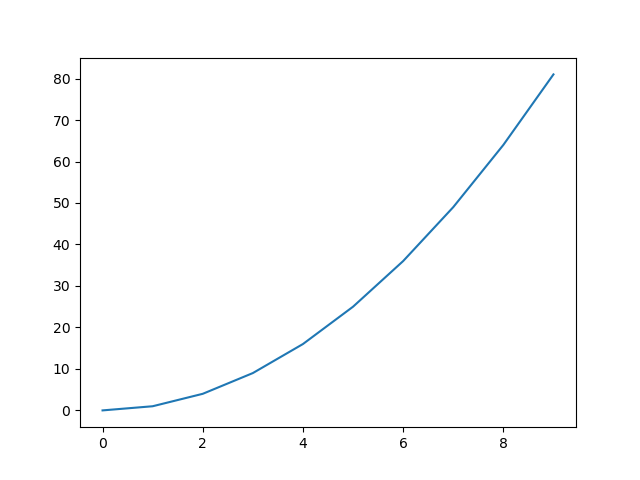

In [116]:
with open('script.py', 'w') as ofile:
    ofile.write("""
import matplotlib.pyplot as plt
import numpy as np

plt.plot(np.arange(10), np.arange(10)**2)
plt.savefig('/home/sergei/test.png')
""")
os.system('python script.py')

from IPython.display import Image
Image(filename='/home/sergei/test.png') 

### `decimal`: Decimal fixed point and floating point arithmetic

In [ ]:
import decimal

In [ ]:
decimal.getcontext().prec = 2
decimal.Decimal(2).sqrt()

In [ ]:
decimal.getcontext().prec = 1000
decimal.Decimal(2).sqrt()

### `itertools`: Functions creating iterators for efficient looping

In [131]:
import itertools

In [132]:
g = itertools.cycle('ABC')
for _ in range(10):
    print(f'{next(g)}', end=' ')

A B C A B C A B C A 

In [133]:
for n in itertools.accumulate(range(10)):
    print(f'{n}', end=' ')

0 1 3 6 10 15 21 28 36 45 

In [134]:
for a, b in itertools.product('ABCD', [1, 2, 3, 4]):
    print(f'{a}{b}', end=' ')

A1 A2 A3 A4 B1 B2 B3 B4 C1 C2 C3 C4 D1 D2 D3 D4 

In [136]:
for a,b,c in itertools.permutations('ABC'):
    print(f'{a}{b}{c}', end=' ')

ABC ACB BAC BCA CAB CBA 

### `datetime`: Basic date and time types

In [137]:
from datetime import date, timedelta
d1 = date.fromisoformat('2020-12-04')

In [138]:
d2 = date(2002, 12, 31)
d1 < d2

False

In [139]:
delta = d1 - d2
delta.days

6548

In [140]:
type(delta)

datetime.timedelta

In [141]:
delta2 = timedelta(days=15)
d3 = d1 + delta2
d3

datetime.date(2020, 12, 19)

In [152]:
d4 = date(2022, 11, 23)
d4.weekday()

2

In [155]:
import calendar

calendar.day_name[d4.weekday()]

'Wednesday'

In [143]:
date.today()

datetime.date(2022, 11, 23)

In [144]:
import time
from datetime import datetime
datetime.fromtimestamp(time.time())

datetime.datetime(2022, 11, 23, 11, 5, 43, 256971)

In [158]:
dt2 = datetime.fromisoformat('2020-07-15 21:47:09.036145')
dt2

datetime.datetime(2020, 7, 15, 21, 47, 9, 36145)

Про формат ISO 8601 см. https://ru.wikipedia.org/wiki/ISO_8601

In [159]:
dt2.timestamp()

1594824429.036145

Время с начала эпохи (00:00:00 UTC for 1 January 1970) в секундах

### `timeit` - измерение времени

In [160]:
import timeit
import numpy as np

code1 = '''
sum=0
for i in range(10000):
    sum += i**2
'''
code2 = 'sum([x**2 for x in range(10000)])'
code3 = 'sum(map(lambda x: x**2, range(10000)))'
code4 = 'sum(x**2 for x in range(10000))'
code5 = '''
import numpy as np
np.sum(np.arange(10000)**2)
'''

In [161]:
for idx, c in enumerate([code1, code2, code3, code4, code5]):
    print(f'code {idx+1}: {timeit.timeit(c, number=1000):.5f}')

code 1: 2.07600
code 2: 2.08747
code 3: 2.19443
code 4: 2.18077
code 5: 0.01259


In [163]:
for idx, c in enumerate([code1, code2, code3, code4, code5]):
    res = timeit.repeat(c, number=1000, repeat=5)
    print(' '.join([f'{item:.3f}' for item in res]))

2.190 2.142 2.202 2.055 2.212
2.032 1.976 1.970 1.925 2.166
2.172 2.114 2.114 2.116 2.118
2.044 2.046 2.034 2.050 2.038
0.012 0.012 0.014 0.014 0.013


Более подробно можно посмотреть в документации https://docs.python.org/3/library/timeit.html

## Сериализация

* Модуль `ast`
* Модуль `pickle`
* Модуль `json`

### ast - abstract syntax tree

In [164]:
import ast

In [165]:
data = [
    1, 2, 'a',
    ['2', 1],
    (3, 2, 1),
    {x: y**2 for x, y in enumerate(range(3))}
]

In [166]:
with open('s1.txt', 'w') as f:
    f.write(repr(data))

In [167]:
with open('s1.txt', 'r') as f:
    restored_data = ast.literal_eval(f.read())

In [168]:
type(restored_data)

list

### pickle - бинарная сериализация

In [169]:
import pickle

In [170]:
data = [
    1, 2, 'a',
    ['2', 1],
    (3, 2, 1),
    {x: y**2 for x, y in enumerate(range(3))}
]

In [171]:
with open('s1.dat', 'wb') as f:
    pickle.dump(data, f)

In [173]:
with open('s1.dat', 'rb') as f:
    restored_data2 = pickle.load(f)

In [174]:
print(restored_data2)

[1, 2, 'a', ['2', 1], (3, 2, 1), {0: 0, 1: 1, 2: 4}]


### JSON - JavaScript Object Notation

In [175]:
import json

In [176]:
data = [
    1, 2, 'a',
    ['2', 1],
    (3, 2, 1),
    {x: y**2 for x, y in enumerate(range(3))}
]

In [177]:
with open('s1.txt', 'w') as f:
    json.dump(data, f)

In [178]:
with open('s1.txt', 'r') as f:
    restored_data3 = json.load(f)

In [179]:
print(restored_data3)

[1, 2, 'a', ['2', 1], [3, 2, 1], {'0': 0, '1': 1, '2': 4}]


## requests

In [182]:
import requests
import json
from datetime import datetime

`requests.get` делает URL запрос. В результате получаем результат запроса (в виде текста). Это может быть, например, текст HTML-разметки, метаданные в формате JSON и т.п. (в зависимости о того, куда делается запрос).

В примере ниже делаем запрос к https://api.open-meteo.com о прогнозе погоды на неделю.

In [183]:
req = requests.get('https://api.open-meteo.com/v1/forecast?latitude=54.843&longitude=83.093&hourly=temperature_2m,rain,snowfall,snow_depth,pressure_msl,windspeed_10m')

In [184]:
wether_data = json.loads(req.text)

In [185]:
x = wether_data['hourly']['time']
x = list(map(lambda s: datetime.strptime(s, "%Y-%m-%dT%H:%M"), x))

In [186]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import MO, TU, WE, TH, FR, SA, SU

Text(0, 0.5, 'Wind spead, Km/h')

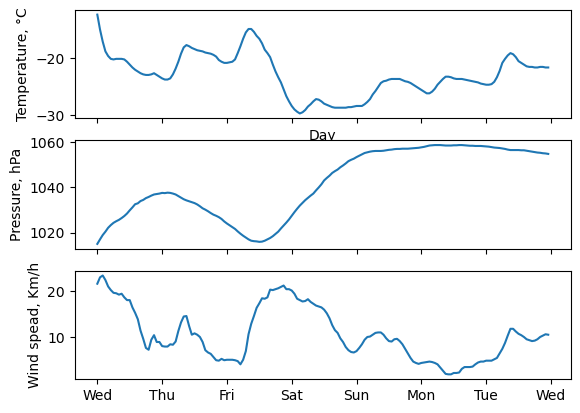

In [201]:
fig, axs = plt.subplots(2, 1, sharex=True)
y = wether_data['hourly']['temperature_2m']
axs[0].plot(x, y)
axs[0].set_xlabel("Day")
axs[0].set_ylabel(u"Temperature, \N{DEGREE SIGN}C")
axs[0].xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=(MO, TU, WE, TH, FR, SA, SU)))
axs[0].xaxis.set_minor_locator(mdates.WeekdayLocator())
axs[0].xaxis.set_major_formatter(mdates.DateFormatter('%a'))
y =  wether_data['hourly']['pressure_msl']
axs[1].plot(x, y)
axs[1].set_ylabel("Pressure, hPa")
y = wether_data['hourly']['windspeed_10m']